## Bike Sharing 

#### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free

A US bike-sharing provider BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19

They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### Business Goal:
Model the demand for shared bikes with the available independent variables.
It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Importing necessary libraries

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [2]:
# Data loading
#Importing dataset
bike_df = pd.read_csv('day.csv')

In [3]:
# Data understanding
# Print first 5 datapoints
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Understand the shape of the dataset
bike_df.shape

# Note: Dataset has 730 rows and 16 columns

(730, 16)

In [5]:
# Fetch the information about the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Gain the statistic info about the dataset.
# Will delve into each features in later point of time
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Data cleaning 

#### Fix Rows and Cloumns
    Incorrect rows - None (no header rows, footer rows)
    Missing Column Names - None (Column names as blanks, NA, XX etc)
    Inconsistent column names - None
    Misaligned columns - None

#### Missing value check

In [7]:
# Find the columns having null values in percentage
(100*bike_df.isnull().mean()).sort_values(ascending=False)

# Inference: No null values found in the columns

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
# Find the rows having null values
len(bike_df[bike_df.isnull().any(axis=1)])

# Inference: No null rows were found

0

#### Duplicates check

In [9]:
# Check if there are any duplicate rows
len(bike_df[bike_df.duplicated()])

# No duplicate rows found

0

#### Understand each columns and select the relevant ones

In [10]:
#Get all the columns
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
# From the observations from the data & data dictionary, followings columns are redundant and hence can be dropped 

## instant: record index (index is not of use for analysis/prediction)
## dteday : date (Coulmns for year & month is already available and hence this columns is not required)
## casual: count of casual users (Target variable cnt is sum of casual & registered and hence casual as seperate column is irrelevant)
## registered: count of registered users (Target variable cnt is sum of casual & registered and hence registered as seperate column is irrelevant)

remove_cols = ["instant", "dteday", "casual", "registered" ]

# Remove columns
bike_df = bike_df.drop(remove_cols, axis=1)

In [12]:
# Data after dropping redundant columns
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# Shape of data after dropping redundant columns
bike_df.shape

(730, 12)

In [14]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [15]:
### Getting the value counts of each column to gain insights about the data

In [16]:
bike_df["season"].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [17]:
bike_df["yr"].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [18]:
bike_df["mnth"].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [19]:
bike_df["holiday"].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [20]:
bike_df["weekday"].value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [21]:
bike_df["workingday"].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [22]:
bike_df["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [23]:
bike_df["temp"].value_counts()

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64

In [24]:
bike_df["atemp"].value_counts()

32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.17435    1
Name: atemp, Length: 689, dtype: int64

In [25]:
bike_df["hum"].value_counts()

61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3
          ..
54.8333    1
56.1765    1
85.0000    1
76.1250    1
57.7500    1
Name: hum, Length: 594, dtype: int64

In [26]:
bike_df["windspeed"].value_counts()

9.041918     3
11.166689    3
11.250104    3
15.333486    3
7.959064     3
            ..
12.416775    1
13.833289    1
14.250632    1
23.044181    1
10.374682    1
Name: windspeed, Length: 649, dtype: int64

In [27]:
bike_df["cnt"].value_counts()

5409    2
2424    2
5698    2
4459    2
5119    2
       ..
5345    1
5046    1
4713    1
4763    1
2729    1
Name: cnt, Length: 695, dtype: int64

In [28]:
# Following columns in the data can be considered as categorical even though it datatype in int/float. 
# Converting the columns to categorical

In [29]:
bike_df['season']=bike_df['season'].astype('category')

In [30]:
bike_df['mnth']=bike_df['mnth'].astype('category')

In [31]:
bike_df['weekday']=bike_df['weekday'].astype('category')

In [32]:
bike_df['weathersit']=bike_df['weathersit'].astype('category')

In [33]:
bike_df.info()

## Below data shows that required columns were converted to dtype "category"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


## Step 2: Visualising the Data

#### Visualising Numeric Variables

Visualize pairplot of numeric variables

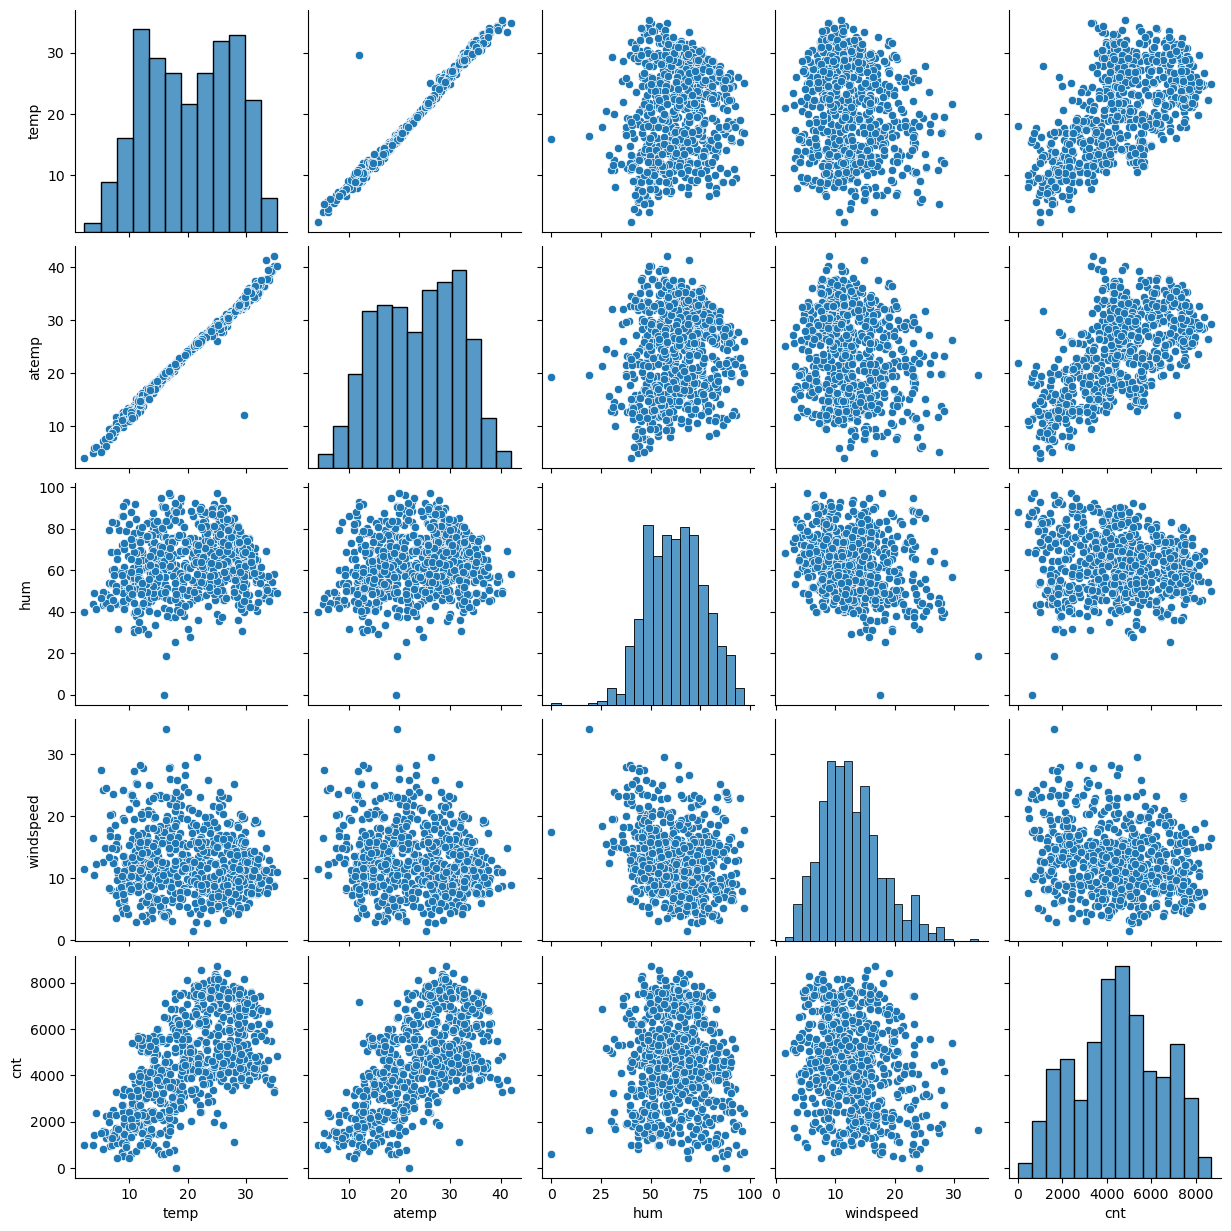

In [34]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(bike_df[num_vars])
plt.show()

In [35]:
# Inference: From the above pair plot , it can be determined that there is a linear relationship between temp, atemp, cnt

In [36]:
bike_df.shape

(730, 12)

#### Visualising Categorical Variables

Boxplot for visualising Categorical Variables

In [37]:
# Function to plot the boxplot with percentage for categorical variables

def plot_boxplot(data, category_col, target_col):
     # total count for each category using groupby
    total_counts = data.groupby(category_col)[target_col].sum()

    # percentage of each category against the total count
    percentage_counts = total_counts / total_counts.sum() * 100

    # Create a box plot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=category_col, y=target_col, data=data)

    # Annotate the box plot with the percentage values
    for i, category in enumerate(percentage_counts.index):
        plt.text(i, 0.95, f"{percentage_counts[category]:.2f}%", ha='center', va='top', transform=plt.gca().transData)

    plt.show()


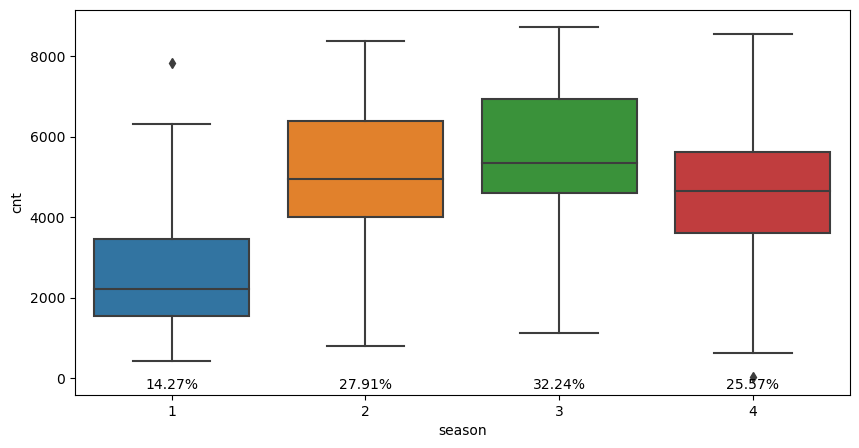

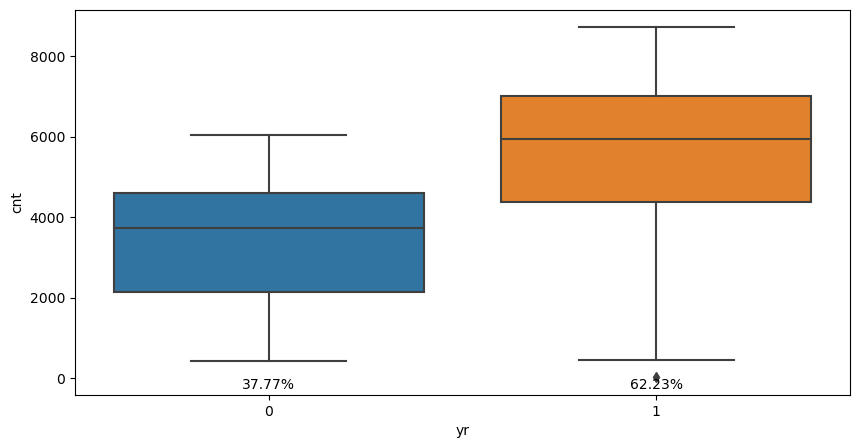

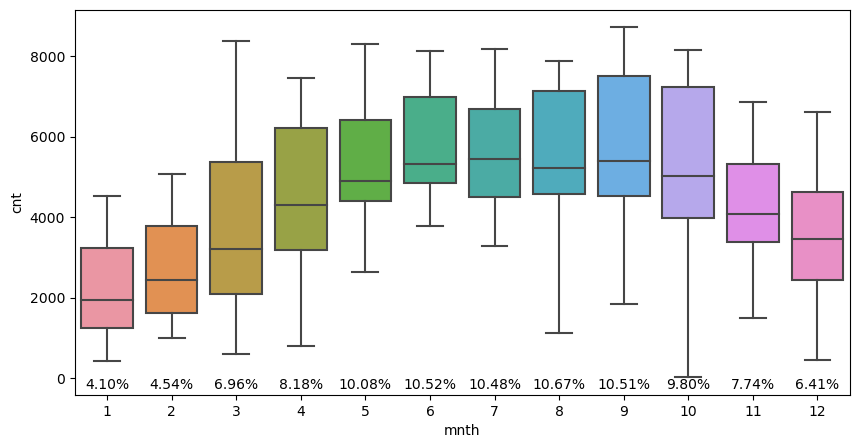

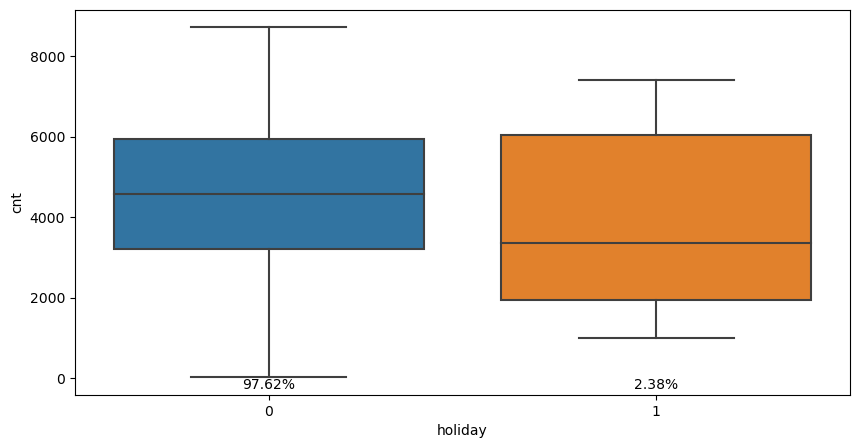

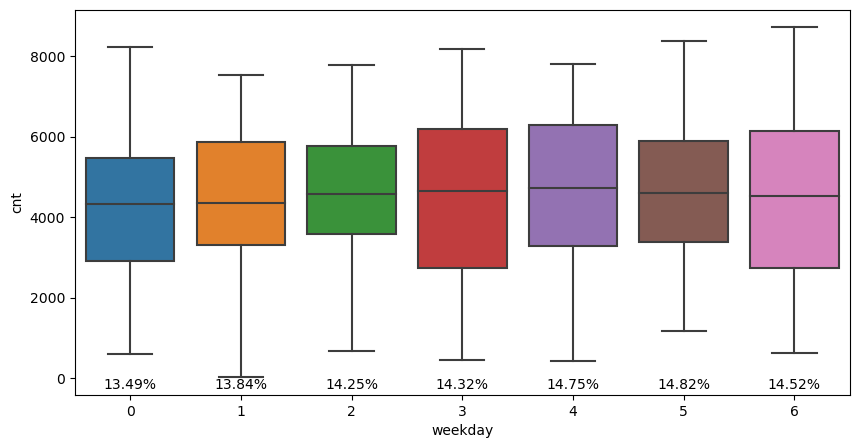

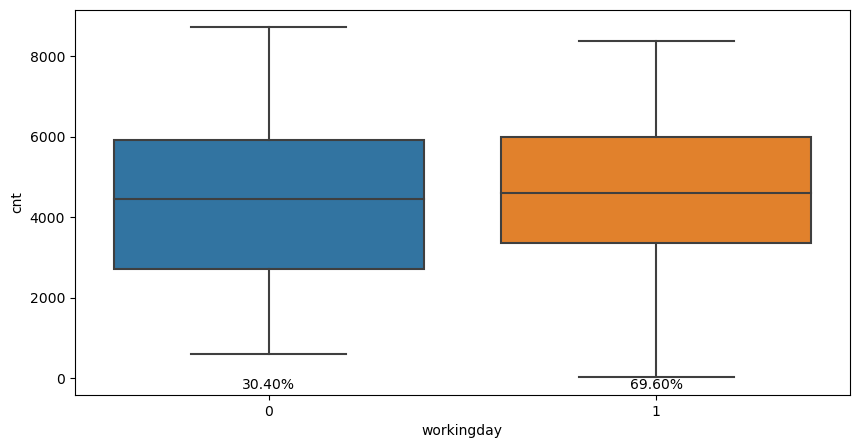

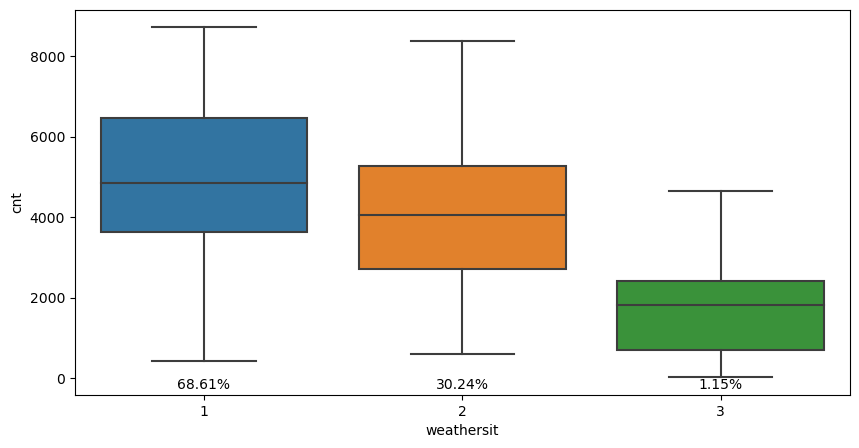

In [38]:
# Invoking function plot_boxplot for categorical varaibles for plotting box plot
plot_boxplot(bike_df,'season','cnt')
plot_boxplot(bike_df,'yr','cnt')
plot_boxplot(bike_df,'mnth','cnt')
plot_boxplot(bike_df,'holiday','cnt')
plot_boxplot(bike_df,'weekday','cnt')
plot_boxplot(bike_df,'workingday','cnt')
plot_boxplot(bike_df,'weathersit','cnt')


In [39]:
# Following are the inferences made from the above boxplots

#Season -  Approx 32% of bookings were made in season 3(fall), 27% and 25% in summer and winter respectively
#year - 62% of bookings were made in 2019
#month - 10% of bookings were made in the month 5,6,7,8,9 (i.e. May, June, July, August, September)
#holiday - Most of the bookings happened on non-holiday
#weekday - Bookings made on weekdays were almost same across
#workingday - 69% of bookings were made on working day
#weather - 68% of bookings were made on weathersit 1: Clear, Few clouds, Partly cloudy, Partly cloudy

## Step 3: Data Preparation

#### Dummy varaibles

In [40]:
# Creating dummy varaibles for categorical varaibles having more than 2 categories in it

In [41]:
def create_dummies(data, column_name):
    # Let's drop the first column from status df using 'drop_first = True'
    status = pd.get_dummies(data[column_name],prefix=column_name, drop_first = True)
    # Add the results to the original housing dataframe
    data = pd.concat([data, status], axis = 1)
    # Drop column as we have created the dummies for it
    data.drop([column_name], axis = 1, inplace = True)
    return data

In [42]:
# Creating dummies for the following categorical columns using create_dummies() function

In [43]:
bike_df =create_dummies(bike_df,"season")

In [44]:
bike_df =create_dummies(bike_df,"weathersit")

In [45]:
bike_df =create_dummies(bike_df,"mnth")

In [46]:
bike_df =create_dummies(bike_df,"weekday")

In [47]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  weathersit_2  730 non-null    uint8  
 12  weathersit_3  730 non-null    uint8  
 13  mnth_2        730 non-null    uint8  
 14  mnth_3        730 non-null    uint8  
 15  mnth_4        730 non-null    uint8  
 16  mnth_5        730 non-null    uint8  
 17  mnth_6        730 non-null    uint8  
 18  mnth_7        730 non-null    

In [48]:
# Inference:  From the info we could see that new dummy columns have been created with (k-1) categories and original column has been dropped

## Step 4: Splitting the Data into Training and Testing Sets

In [49]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_df_train, bike_df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [50]:
bike_df.shape

(730, 30)

In [51]:
# Shape of train data
bike_df_train.shape

(510, 30)

In [52]:
# Shape of test data
bike_df_test.shape

(219, 30)

### Rescaling the Features 

Using Min-Max scalar for rescaling the features

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
bike_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  weathersit_2  510 non-null    uint8  
 12  weathersit_3  510 non-null    uint8  
 13  mnth_2        510 non-null    uint8  
 14  mnth_3        510 non-null    uint8  
 15  mnth_4        510 non-null    uint8  
 16  mnth_5        510 non-null    uint8  
 17  mnth_6        510 non-null    uint8  
 18  mnth_7        510 non-null   

In [56]:
# Apply scaler() to all the numerical columns 
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_df_train[num_vars] = scaler.fit_transform(bike_df_train[num_vars])

#Note: fit_transform is used only for train data not for test data

In [57]:
bike_df_train[num_vars].head()

#After scaling it is observed that data is between 0 ad 1

,temp,atemp,hum,windspeed,cnt
653,0.509887,0.501133,0.575354,0.300794,0.864243
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973


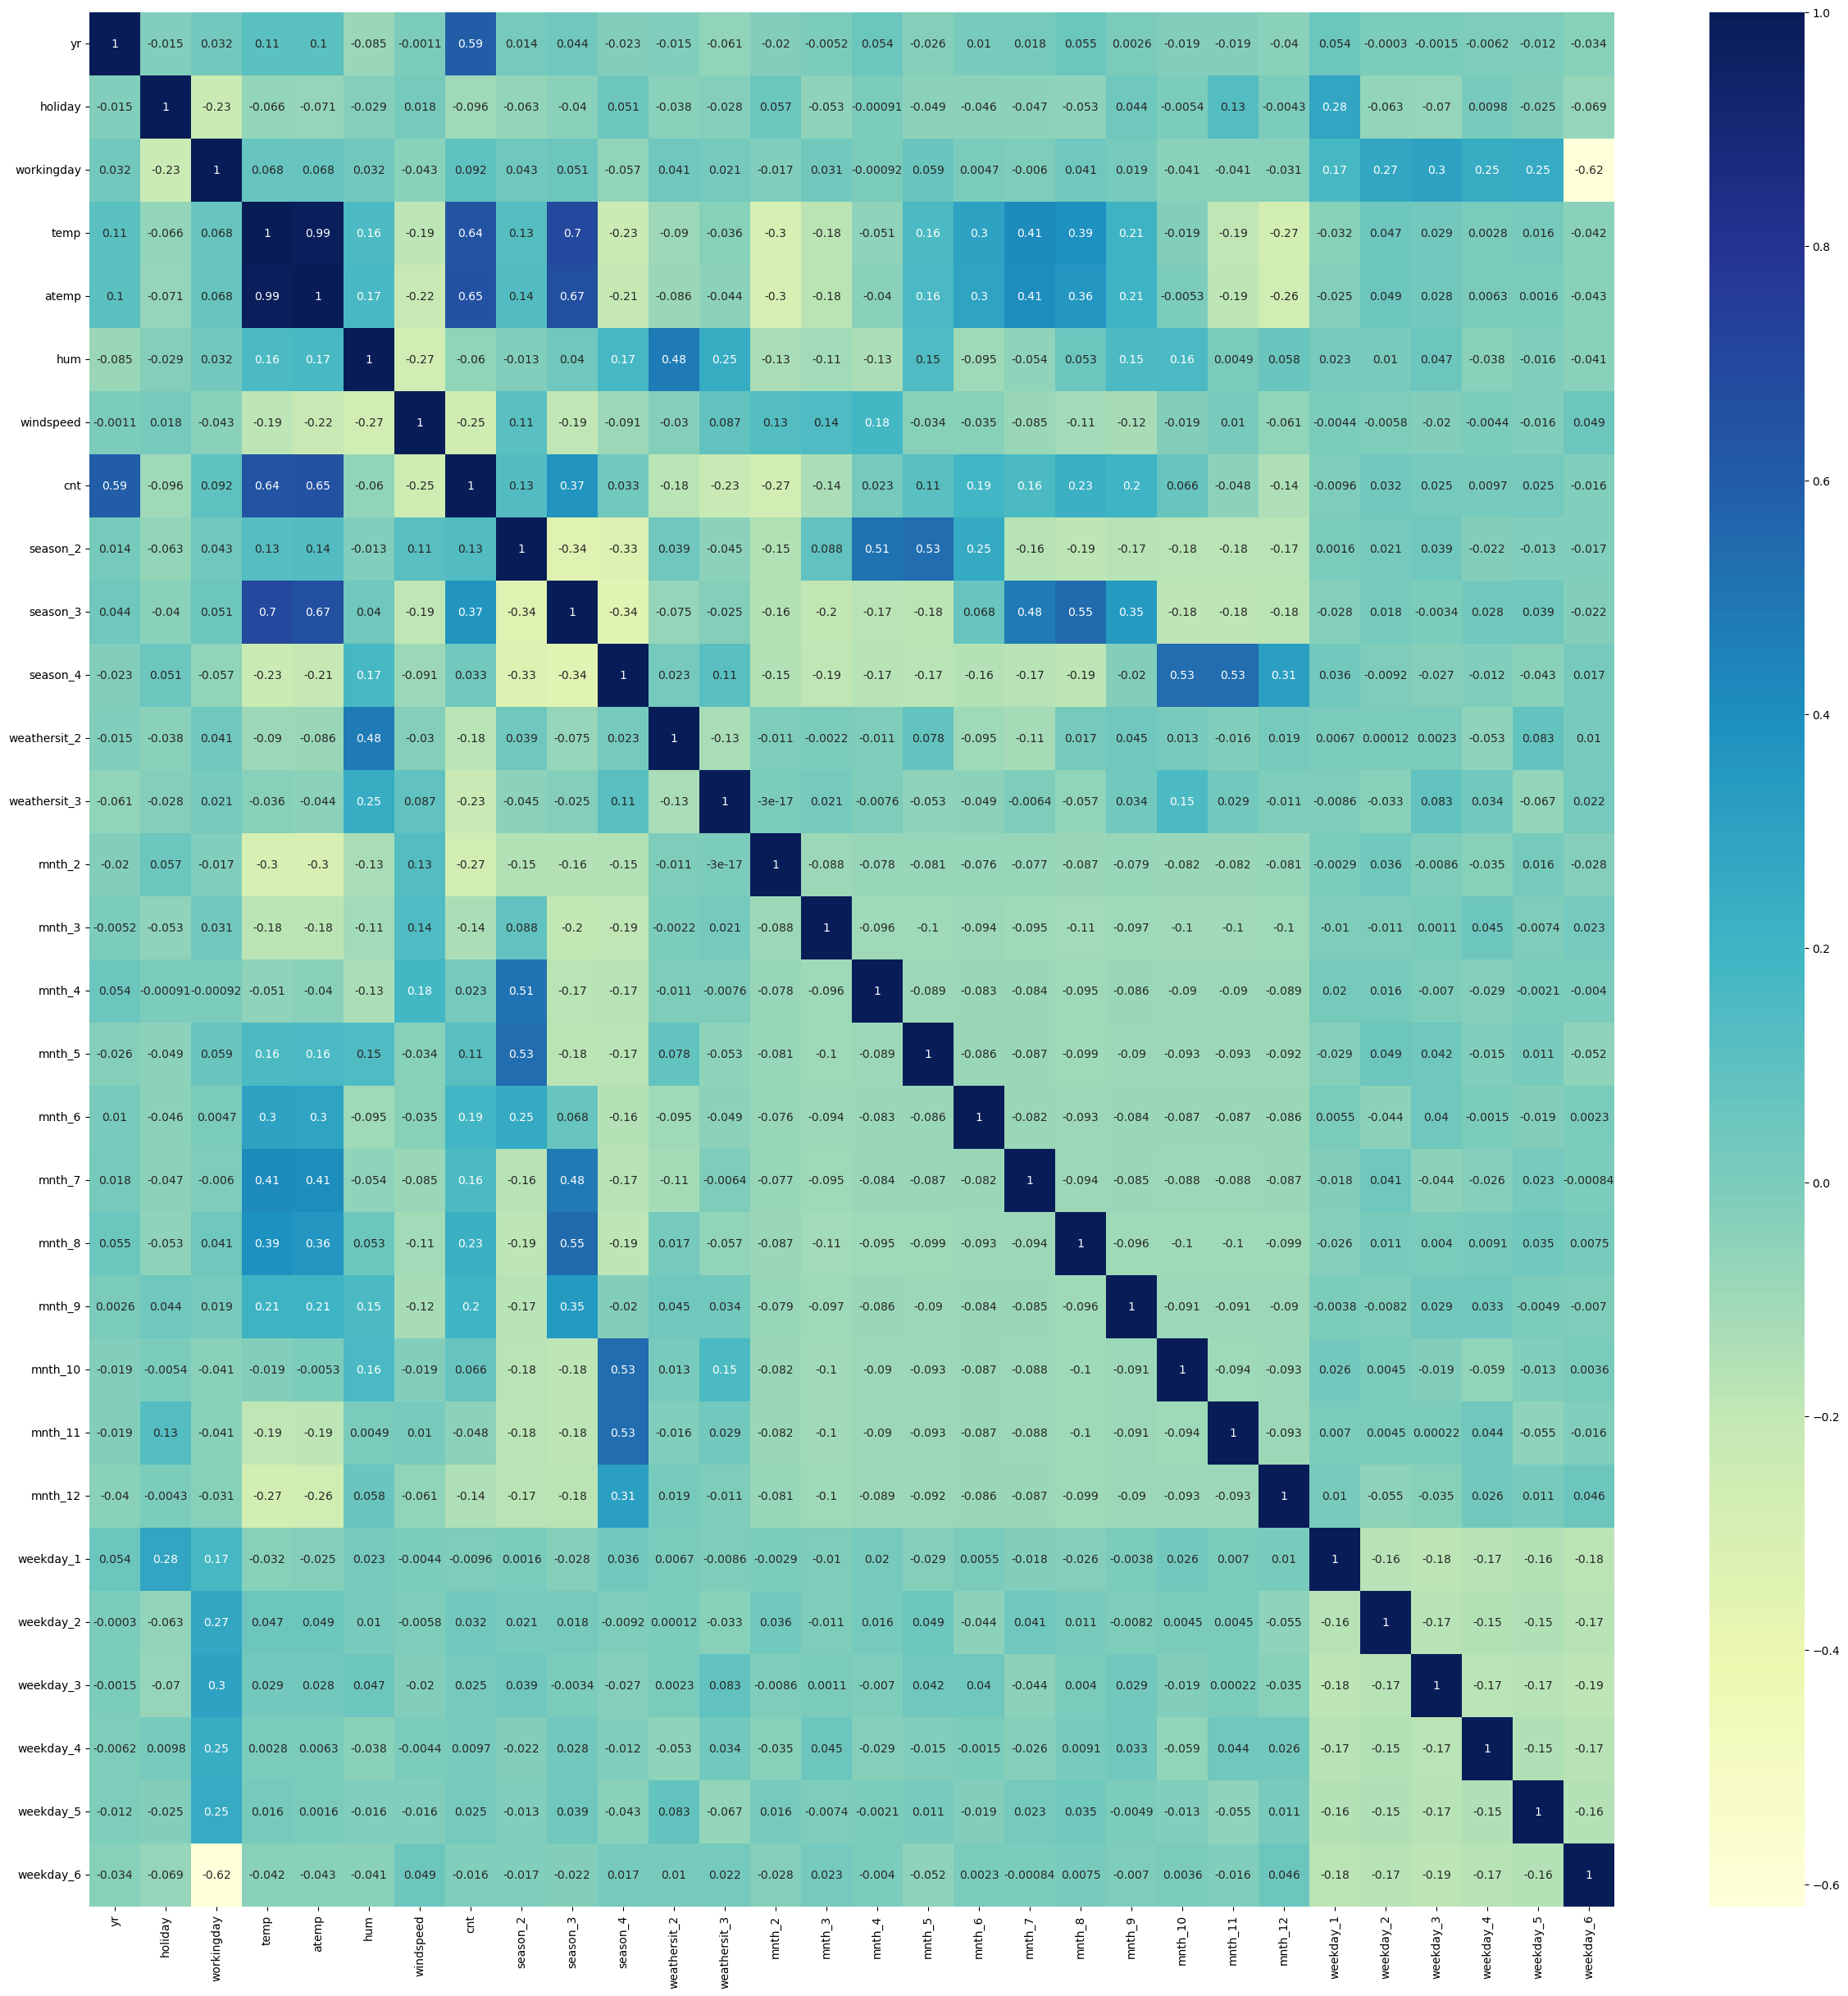

In [58]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
sns.heatmap(bike_df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [59]:
# From the above heatmap, it is observed that cnt is correlated with temp, atemp, yr

### Dividing into X and Y train sets for the model building


In [60]:
# Create y_train with 'cnt' variable
y_train = bike_df_train.pop('cnt')

# Create x_train with variables other than 'cnt' 
X_train = bike_df_train

In [61]:
# Check contents in y_train
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [62]:
# Check contents in X_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,1,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Building the model

Model shall be built using LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

Feature selection is done using automated way RFE (Recursive feature elimination)

In [63]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [64]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE with n_features_to_select as 15 (chose 50% of features)
rfe = rfe.fit(X_train, y_train)

In [65]:

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1)]

In [66]:
# Getting the selected features by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'weathersit_2', 'weathersit_3', 'mnth_8',
       'mnth_9', 'mnth_10', 'weekday_6'],
      dtype='object')

In [67]:
# Rejected features by RFE
X_train.columns[~rfe.support_]


Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [68]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

Note: Here onwards, we will be using VIF and OLS summary to reject/select features to build a Linear regression model.
Variance inflation factor (VIF) is a statistical measure that quantifies the degree of multicollinearity in a set of predictor variables in a regression model

This will be an iterative process until a better model is obtained

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to Calculate the VIFs for the model
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [70]:
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_3,season_4,weathersit_2,weathersit_3,mnth_8,mnth_9,mnth_10,weekday_6
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,0,1


In [71]:
# Calculate VIF for X_train_rfe (dataframe with RFV selected features)
calculateVIF(X_train_rfe)

,Features,VIF
3,temp,24.06
4,hum,17.47
7,season_3,8.19
2,workingday,5.05
5,windspeed,3.88
6,season_2,3.44
8,season_4,2.88
9,weathersit_2,2.15
0,yr,2.04
14,weekday_6,1.90


In [72]:
# FRom the above VIF , it is observed that hum (humidity) has high VIF

In [73]:
# Building 1st model

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()

# OLS summary
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          1.89e-191
Time:                        17:19:00   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1950      0.029      6.791   

In [74]:
# Dropping "hum" variable due to high VIF
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

In [75]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_2',
       'season_3', 'season_4', 'weathersit_2', 'weathersit_3', 'mnth_8',
       'mnth_9', 'mnth_10', 'weekday_6'],
      dtype='object')

In [76]:
# Calculate VIF 
calculateVIF(X_train_new)

,Features,VIF
3,temp,16.80
6,season_3,7.78
2,workingday,4.45
4,windspeed,3.72
5,season_2,3.40
7,season_4,2.78
0,yr,2.04
10,mnth_8,1.85
13,weekday_6,1.79
12,mnth_10,1.64


In [77]:
# FRom the above VIF , it is observed that season_3 has high VIF

In [78]:
# Building 2nd model

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()

# OLS summary
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.7
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          1.40e-188
Time:                        17:19:00   Log-Likelihood:                 510.49
No. Observations:                 510   AIC:                            -991.0
Df Residuals:                     495   BIC:                            -927.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1012      0.019      5.239   

In [79]:
# Dropping "season_3" variable because its has high VIF
X_train_new = X_train_new.drop(['season_3'], axis = 1)

In [80]:
# Calculate VIF 
calculateVIF(X_train_new)

,Features,VIF
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
6,season_4,2.02
5,season_2,1.82
12,weekday_6,1.77
11,mnth_10,1.62
9,mnth_8,1.59
7,weathersit_2,1.54


In [81]:
# Building 3rd model

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()

# OLS summary
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          6.16e-189
Time:                        17:19:00   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0945      0.019      4.961   

In [82]:
# We shall proceed with model X_train_lm_3
# FRom the OLS stats , its observed that p-values of features are <0.05 and hence null hypothesis B1=0 can be rejected.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Assumptions of linear regression:
- There is a linear relationship between X and Y
- Error terms are normally distributed with mean zero(not X, Y): error terms not being normally distributed is that the p-values obtained during the hypothesis test to determine the significance of the coefficients become unreliable.
- Error terms are independent of each other
- Error terms have constant variance (homoscedasticity): The variance should not increase (or decrease) as the error values change.Also, the variance should not follow any pattern as the error terms change


In [83]:
y_train_bike = lr_3.predict(X_train_lm_3)

Text(0.5, 0, 'Errors')

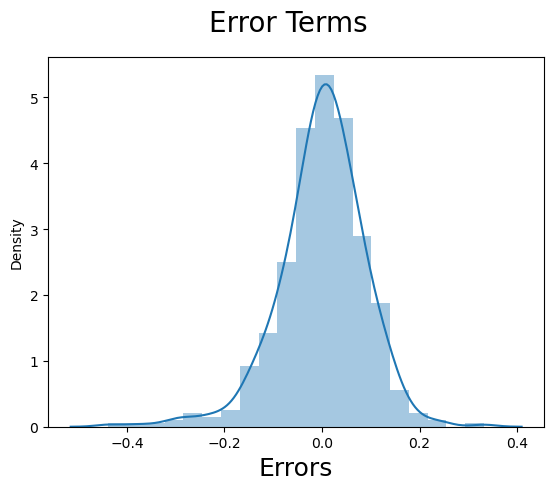

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_bike), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                        

In [85]:
#From the above distplot it is observed that Error terms are normally distributed with mean zero

In [86]:
# Earlier, in pairplot we have seen that there is a linear relationship between X and y

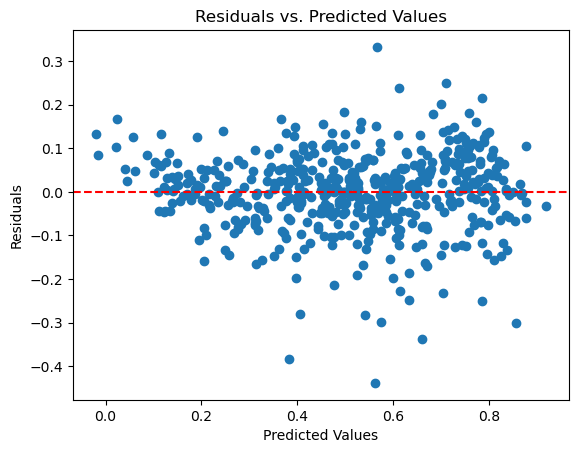

In [87]:
# Plot to view homoscedacity

# Assuming model is your fitted linear regression model
predictions = lr_3.predict(X_train_lm_3)
residuals = y_train - predictions

# Residuals vs. Predicted Values
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--') 
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


In [88]:
#From the above plot it can be inferred that Error terms have constant variance (homoscedasticity)

In [89]:
# Error terms are independent of each other. This can be proved with The Durbin-Watson statistic tests value around 2 suggests no autocorrelation. 

#Durbin-Watson:2.034 is the value obtained from the selected model OLS stats

## Making Predictions

#### Applying the scaling on the test sets

In [90]:
# Apply scaler() to all the numerical columns 
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_df_test[num_vars] = scaler.transform(bike_df_test[num_vars])


In [91]:
bike_df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,1,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,0,0,1,0,0


#### Dividing into X_test and y_test

In [92]:
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test

In [93]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [94]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  weathersit_2  219 non-null    uint8  
 11  weathersit_3  219 non-null    uint8  
 12  mnth_2        219 non-null    uint8  
 13  mnth_3        219 non-null    uint8  
 14  mnth_4        219 non-null    uint8  
 15  mnth_5        219 non-null    uint8  
 16  mnth_6        219 non-null    uint8  
 17  mnth_7        219 non-null    uint8  
 18  mnth_8        219 non-null   

In [95]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [96]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   workingday    219 non-null    int64  
 4   temp          219 non-null    float64
 5   windspeed     219 non-null    float64
 6   season_2      219 non-null    uint8  
 7   season_4      219 non-null    uint8  
 8   weathersit_2  219 non-null    uint8  
 9   weathersit_3  219 non-null    uint8  
 10  mnth_8        219 non-null    uint8  
 11  mnth_9        219 non-null    uint8  
 12  mnth_10       219 non-null    uint8  
 13  weekday_6     219 non-null    uint8  
dtypes: float64(3), int64(3), uint8(8)
memory usage: 13.7 KB


In [97]:
# Making predictions
y_pred = lr_3.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

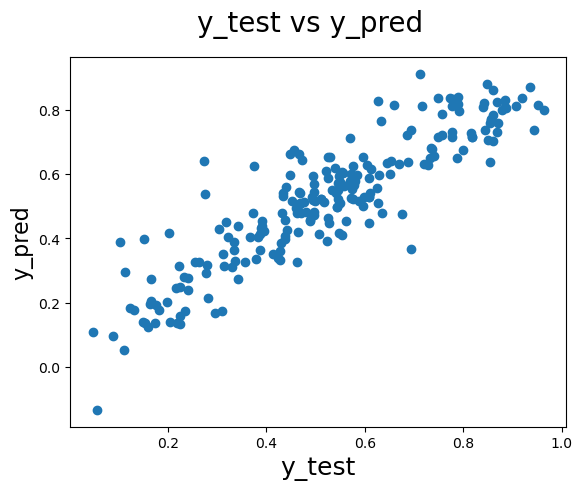

In [98]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                         

In [99]:
#R-squared score on test data 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8026410728126752

In [100]:
r2 = 0.8026410728126752
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7723584861013926

### R-squared score

    Train dataset R-squared: 0.842
    Test dataset R-squared: 0.8026410728126752
    
    Based on the R-squared values, the model apperas to be performing well on both training and test data

### Adjusted R-square

For Multiple linear regression, it is better to infer the Adjusted R-square as it penalizes the unnecessary features

    Train dataset Adjusted R-squared: 0.838   
    Test dataset Adjusted R-squared: 0.7723584861013926

In [101]:
# Vieweing the coefficients
lr_3.params

const           0.094532
yr              0.232930
holiday        -0.054309
workingday      0.047453
temp            0.509903
windspeed      -0.153226
season_2        0.100823
season_4        0.126698
weathersit_2   -0.085353
weathersit_3   -0.294243
mnth_8          0.054237
mnth_9          0.118863
mnth_10         0.037144
weekday_6       0.058013
dtype: float64

### Inferences
- Top 3 features contributing significantly towards explaining the demand of the shared bikes are:
   - Temp (Temperature): It has coefficient of  0.509903
   - Yr (year): It has coefficient of 0.232930
   - Weathersit_3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds): It has coefficient of  -0.294243
- From the distplot of residuals it is observed that Error terms are normally distributed with mean zero
- Based on the R2 and Adjusted-R2 values, the model apperas to be performing well on both training and test data